In [1]:
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("08-email_classification_svm.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   subject_formality_score    1000 non-null   float64
 1   sender_relationship_score  1000 non-null   float64
 2   email_type                 1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


In [4]:
df.describe()

,subject_formality_score,sender_relationship_score,email_type
count,1000.000000,1000.000000,1000.000000
mean,-1.009046,-0.006300,0.498000
std,0.654219,1.059501,0.500246
min,-3.532770,-2.218219,0.000000
25%,-1.252867,-1.006076,0.000000
50%,-0.994760,0.439233,0.000000
75%,-0.754839,0.994943,1.000000
max,2.180933,1.699497,1.000000


In [5]:
# Email Classification (Work vs Personal)
# subject_formality_score -> Score based on formality of subject line
# sender_relationship_score -> Score representing how familiar the sender is
# email_type -> 0 = Personal, 1 = Work email

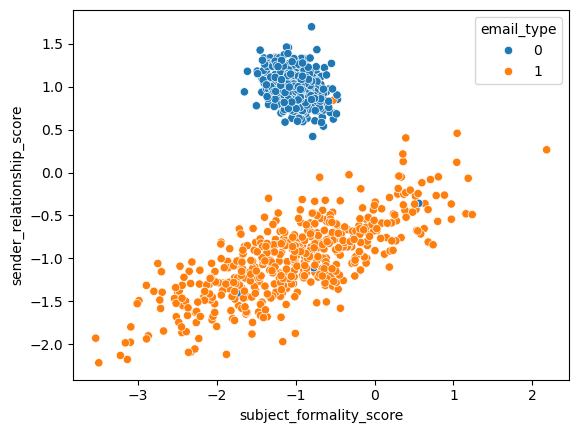

In [6]:
sns.scatterplot(x=df['subject_formality_score'],y=df['sender_relationship_score'],hue=df['email_type'])
plt.show()

In [7]:
# it is obvious that we can classify this kind of dataset with a linear approach

In [8]:
X = df[["subject_formality_score", "sender_relationship_score"]].values
y = df["email_type"].values   # 0 or 1 

In [9]:
y

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
X_train = torch.tensor(X_train, dtype=torch.float32)   # shape: (800, 2)
X_test  = torch.tensor(X_test,  dtype=torch.float32)   # shape: (200, 2)

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)  # shape: (800, 1)
y_test  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1)  # shape: (200, 1)

In [13]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([800, 2]) torch.Size([800, 1])
torch.Size([200, 2]) torch.Size([200, 1])


In [14]:
from torch import nn

In [15]:
class ClassificationModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. let's create two layers these time with 5 neurons
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features (X), outputs 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features, outputs 1 feature (y)
    
    def forward(self, x):
        # we can define this layers in a sequential order and then we do not need to do the step below, but we need to learn this as well
        return self.layer_2(self.layer_1(x)) # computation goes through layer_1 first then the output of layer_1 goes through layer_2

In [16]:
model_0 = ClassificationModel()

In [17]:
# Create a loss function
# loss_fn = nn.BCELoss() # BCELoss = no sigmoid built-in
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid built-in in the loss function

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [18]:
# Calculate accuracy. we can use torchmetrics for measuring accuracy, but let's do it manually now
def calculate_accuracy(y_test, y_pred):
    correct = torch.eq(y_test, y_pred).sum().item() # torch.eq() calculates when two tensors are equal
    accuracy = (correct / len(y_pred)) * 100 
    return accuracy

In [19]:
# let's look at the predictions without training to understand logits and sigmoid

In [20]:
# View the frist 5 predictions
y_logits = model_0(X_test)[:5]

In [21]:
y_logits

tensor([[0.6691],
        [1.2601],
        [0.8257],
        [0.8766],
        [0.6800]], grad_fn=<SliceBackward0>)

In [22]:
# so how do we decide if they are 0 or 1? personal or work related? we need sigmoid to make sense of them

In [23]:
y_pred_probs = torch.sigmoid(y_logits)

In [24]:
y_pred_probs

tensor([[0.6613],
        [0.7790],
        [0.6954],
        [0.7061],
        [0.6637]], grad_fn=<SigmoidBackward0>)

In [25]:
# if they are above 0.5 then we can call it 1 and if they are less 0

In [26]:
y_preds = torch.round(y_pred_probs)

In [27]:
y_preds

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)

In [28]:
y_preds.squeeze()

tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)

In [29]:
# as you can see now it makes sense. now obviously we need to train or model then do this step

In [30]:
torch.manual_seed(42)
epochs = 100

for epoch in range(epochs):
    # Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train) 
    y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probs -> pred labls
  
    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train) 
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train) 
    acc = calculate_accuracy(y_test=y_train, 
                      y_pred=y_pred) 

    # 3. optimizer reset
    optimizer.zero_grad()

    # 4. back prop and optimization
    loss.backward()

    # 5. 
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test)
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = calculate_accuracy(y_test=y_test,
                               y_pred=test_pred)

    if epoch % 5 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.73542, Accuracy: 50.25% | Test loss: 0.74373, Test acc: 47.50%
Epoch: 5 | Loss: 0.70873, Accuracy: 50.25% | Test loss: 0.71608, Test acc: 47.50%
Epoch: 10 | Loss: 0.68367, Accuracy: 50.25% | Test loss: 0.69013, Test acc: 47.50%
Epoch: 15 | Loss: 0.66010, Accuracy: 50.25% | Test loss: 0.66570, Test acc: 47.50%
Epoch: 20 | Loss: 0.63788, Accuracy: 50.12% | Test loss: 0.64266, Test acc: 47.50%
Epoch: 25 | Loss: 0.61687, Accuracy: 50.12% | Test loss: 0.62088, Test acc: 47.50%
Epoch: 30 | Loss: 0.59697, Accuracy: 50.12% | Test loss: 0.60024, Test acc: 47.50%
Epoch: 35 | Loss: 0.57809, Accuracy: 50.38% | Test loss: 0.58066, Test acc: 47.00%
Epoch: 40 | Loss: 0.56014, Accuracy: 50.88% | Test loss: 0.56204, Test acc: 47.50%
Epoch: 45 | Loss: 0.54305, Accuracy: 54.12% | Test loss: 0.54432, Test acc: 53.00%
Epoch: 50 | Loss: 0.52675, Accuracy: 66.00% | Test loss: 0.52742, Test acc: 66.50%
Epoch: 55 | Loss: 0.51119, Accuracy: 79.25% | Test loss: 0.51129, Test acc: 77.50%
Epoch:

In [31]:
import numpy as np
def plot_linear_decision_boundary(model, X, y):

    # layer_1: (5,2)
    # layer_2: (1,5)
    # toplam efektif ağırlık = layer_2.weight @ layer_1.weight = (1,2)
    W1 = model.layer_1.weight.detach().numpy()       # shape (5,2)
    b1 = model.layer_1.bias.detach().numpy()         # shape (5,)
    W2 = model.layer_2.weight.detach().numpy()       # shape (1,5)
    b2 = model.layer_2.bias.detach().numpy()[0]      # shape (1,)

    # efektif W ve b
    # W_eff = W2 * W1
    W_eff = W2 @ W1   # shape (1,2)
    w1, w2 = W_eff[0] # iki feature'ın ağırlığı

    # efektif b = W2 * b1 + b2
    b_eff = (W2 @ b1)[0] + b2

    # X aralığı
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    xs = np.linspace(x_min, x_max, 200)

    # Doğru denkleminden x2 hesaplama
    # w1*x1 + w2*x2 + b = 0  →  x2 = -(w1*x1 + b) / w2
    ys = -(w1 * xs + b_eff) / w2

    # Noktalar
    plt.scatter(X[:, 0], X[:, 1], c=y.squeeze(), cmap=plt.cm.RdYlBu, s=40)
    plt.plot(xs, ys, "k-", linewidth=3)
    plt.xlabel("subject_formality_score")
    plt.ylabel("sender_relationship_score")
    plt.xlim(x_min, x_max)
    plt.ylim(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5)

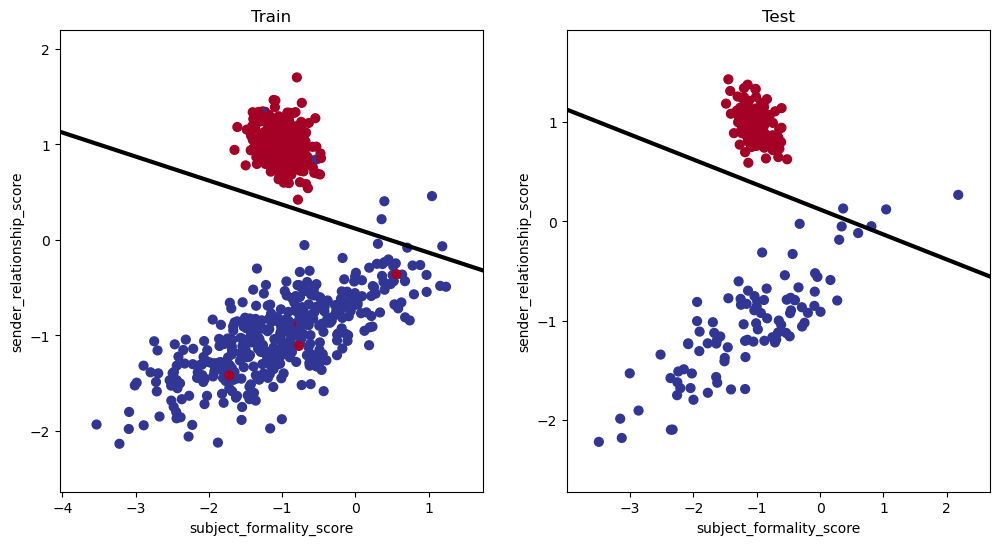

In [32]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_linear_decision_boundary(model_0, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_linear_decision_boundary(model_0, X_test, y_test)

plt.show()

In [33]:
# ok as you can see it worked great when data could be classified easily with a linear function.
# let's see what we can do with a much different data?

In [34]:
# Seismic Activity Classification
# underground_wave_energy -> Energy level of underground seismic wave (high variance)
# vibration_axis_variation -> Localized vibration variation on a vertical axis
# seismic_event_detected -> 1 = Seismic Event, 0 = No event (binary classification)

In [35]:
df = pd.read_csv("08-seismic_activity_svm.csv")

In [36]:
df.head()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
0,9.539392,-3.000000,0
1,9.558241,-2.939394,0
2,9.576669,-2.878788,0
3,9.594678,-2.818182,0
4,9.612272,-2.757576,0


In [37]:
df.describe()

,underground_wave_energy,vibration_axis_variation,seismic_event_detected
count,400.000000,4.000000e+02,400.000000
mean,0.000000,8.881784e-18,0.500000
std,7.719350,1.751650e+00,0.500626
min,-9.999954,-3.000000e+00,0.000000
25%,-6.134779,-1.500000e+00,0.000000
50%,0.000000,0.000000e+00,0.500000
75%,6.134779,1.500000e+00,1.000000
max,9.999954,3.000000e+00,1.000000


In [38]:
df["seismic_event_detected"].value_counts()

seismic_event_detected
0    200
1    200
Name: count, dtype: int64

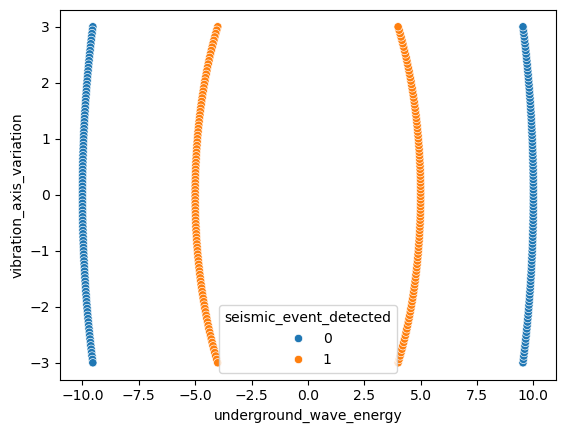

In [39]:
sns.scatterplot(x=df['underground_wave_energy'],y=df['vibration_axis_variation'],hue=df['seismic_event_detected'])
plt.show()

In [40]:
X = df[["underground_wave_energy", "vibration_axis_variation"]].values
y = df["seismic_event_detected"].values

In [41]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train = torch.tensor(X_train, dtype=torch.float32)  
X_test  = torch.tensor(X_test,  dtype=torch.float32)   

y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1) 
y_test  = torch.tensor(y_test,  dtype=torch.float32).unsqueeze(1) 

In [44]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

torch.Size([320, 2]) torch.Size([320, 1])
torch.Size([80, 2]) torch.Size([80, 1])


In [45]:
class ClassificationNonLinearModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU() # <- add in ReLU activation function

    def forward(self, x):
      # ReLU function between layers
       return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

In [46]:
model1 = ClassificationNonLinearModel()

In [49]:
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(params=model1.parameters(), lr=0.001) # try with SGD and Adam, you will see the difference

In [48]:
torch.manual_seed(42)
epochs = 500

for epoch in range(epochs):
    # 1. Forward pass
    y_logits = model1(X_train)
    y_pred = torch.round(torch.sigmoid(y_logits))
    
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_train) 
    acc = calculate_accuracy(y_test=y_train, 
                      y_pred=y_pred)
    
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model1.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model1(X_test)
      test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
      # 2. Calculate loss and accuracy
      test_loss = loss_fn(test_logits, y_test)
      test_acc = calculate_accuracy(y_test=y_test,
                             y_pred=test_pred)

    
    if epoch % 50 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.68715, Accuracy: 57.81% | Test Loss: 0.68227, Test Accuracy: 58.75%
Epoch: 50 | Loss: 0.61604, Accuracy: 57.50% | Test Loss: 0.57309, Test Accuracy: 67.50%
Epoch: 100 | Loss: 0.56989, Accuracy: 58.13% | Test Loss: 0.53181, Test Accuracy: 65.00%
Epoch: 150 | Loss: 0.50507, Accuracy: 70.31% | Test Loss: 0.48124, Test Accuracy: 71.25%
Epoch: 200 | Loss: 0.41347, Accuracy: 86.25% | Test Loss: 0.40966, Test Accuracy: 88.75%
Epoch: 250 | Loss: 0.30355, Accuracy: 99.69% | Test Loss: 0.29827, Test Accuracy: 100.00%
Epoch: 300 | Loss: 0.20455, Accuracy: 100.00% | Test Loss: 0.19371, Test Accuracy: 100.00%
Epoch: 350 | Loss: 0.12971, Accuracy: 100.00% | Test Loss: 0.12209, Test Accuracy: 100.00%
Epoch: 400 | Loss: 0.08212, Accuracy: 100.00% | Test Loss: 0.07696, Test Accuracy: 100.00%
Epoch: 450 | Loss: 0.05380, Accuracy: 100.00% | Test Loss: 0.04980, Test Accuracy: 100.00%


In [50]:
def plot_nonlinear_decision_boundary(model, X, y):

    # Grid alanını tanımla (tüm veri aralığını kapsasın)
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx, yy = np.meshgrid(
        np.linspace(x_min, x_max, 300),
        np.linspace(y_min, y_max, 300)
    )

    # Grid'i modele sokmak için tensor'a çevir
    grid_points = torch.tensor(
        np.c_[xx.ravel(), yy.ravel()],
        dtype=torch.float32
    )

    # Tahmin al
    model.eval()
    with torch.inference_mode():
        logits = model(grid_points)
        preds = torch.sigmoid(logits).numpy().reshape(xx.shape)  # probability map

    # Decision boundary çizimi (0.5 threshold)
    plt.contourf(xx, yy, preds, cmap=plt.cm.RdYlBu, alpha=0.7)
    
    # Gerçek noktalar
    plt.scatter(X[:,0], X[:,1], c=y.squeeze(), cmap=plt.cm.RdYlBu, s=30, edgecolor="k")
    plt.xlabel("underground_wave_energy")
    plt.ylabel("vibration_axis_variation")
    plt.title("Non-linear Decision Boundary")

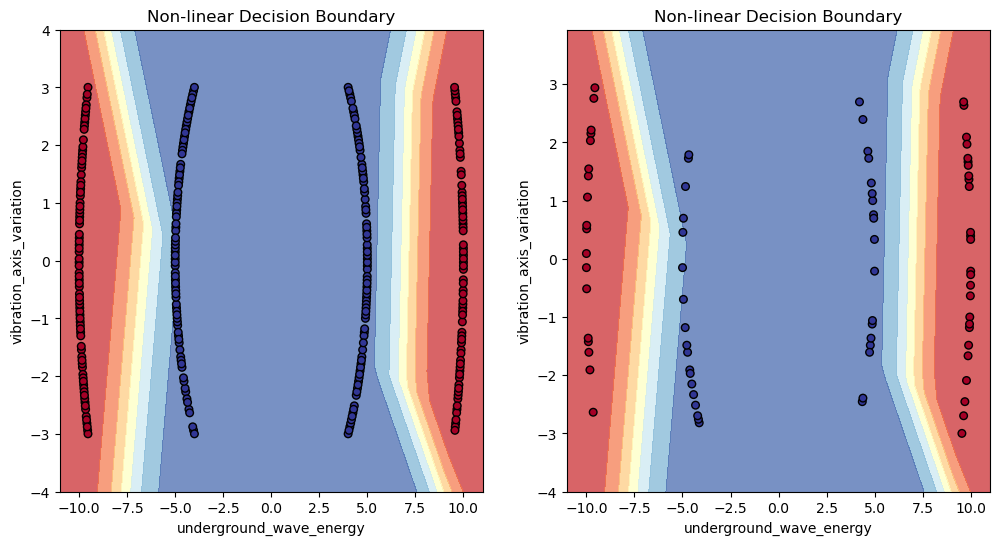

In [51]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title("Train")
plot_nonlinear_decision_boundary(model1, X_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_nonlinear_decision_boundary(model1, X_test, y_test)

plt.show()